# Домашнее задание 2 (5 баллов).

Все задания ниже имеют равный вес (5/16).

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Описание данных

В папке Dat (https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/Data.zip) находится информация о студентах. Всего 10 групп студентов. Файлы делятся на две категории:
    * Students_info_i - информация о студентах из группы i
    * Students_marks_i - оценки студентов из группы i за экзамены

### Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: merge, join, concat. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.

Подробно об этих методах посмотрите тут: https://www.kaggle.com/residentmario/renaming-and-combining#Combining

In [4]:
#сначала создаем пустой фрейм с нужными колонками, где в итоге будет вся нужная инфа
df = pd.DataFrame(columns=['index','gender','race/ethnicity','parental level of education','lunch','test preparation course','group', 'math score','reading score','writing score'])

#проходимся циклом по всем файлам
for i in range(10):
  DATA_MARKS = 'Data/Students_marks_' + str(i) +'.csv'
  DATA_INFO = 'Data/Students_info_' + str(i) +'.csv'
  data_marks = pd.read_csv(DATA_MARKS, delimiter=',') #фрейм для оценок
  data_info = pd.read_csv(DATA_INFO, delimiter=',') #фрейм о студентах
  data_merge=data_info.merge(data_marks, on='index') #смерджили 2 фрейма
  df=pd.concat([df, data_merge], ignore_index=True) #добавили инфу о i студентах и их оценках в df

#### Задание 1. Соберите всю информацию о студентах в одну таблицу df. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.¶

In [5]:
df.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,4,male,group C,some college,standard,none,group1,76,78,75


#### Задание 2. Удалите столбец index у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [6]:
df=df.iloc[:,1:]

In [7]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
5,female,group B,associate's degree,standard,none,group1,71,83,78
6,female,group B,some college,standard,completed,group1,88,95,92
7,male,group B,some college,free/reduced,none,group1,40,43,39
8,male,group D,high school,free/reduced,completed,group1,64,64,67
9,female,group B,high school,free/reduced,none,group1,38,60,50


#### Задание 3. Выведите на экран размеры полученной таблицы

In [8]:
df.shape

(1000, 9)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [16]:
df.info() #сейчас в таблице все колонки имеют значения типа object, нужно числовые привести к числовому типу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   group                        1000 non-null   object
 6   math score                   1000 non-null   object
 7   reading score                1000 non-null   object
 8   writing score                1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [22]:
#приводим оценки к численному типу данных
df['math score'] = pd.to_numeric(df['math score'])
df['reading score'] = pd.to_numeric(df['reading score'])
df['writing score'] = pd.to_numeric(df['writing score'])

In [23]:
df.info() #ура получилось!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   group                        1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [24]:
#теперь и стат характеристики можно посчитать
df[['math score','reading score','writing score']].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [12]:
df.isnull().any().any() #ответ False - значит, пропущенных значений в таблице нет

False

#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (math, reading, writing)

In [20]:
df['math score'].mean() #средний балл по math - 66.089

66.089

In [14]:
df['reading score'].mean() # средний балл по чтению - 69.169

69.169

In [15]:
df['writing score'].mean() #средний балл по письму - 68.054

68.054

**Задание 7. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)? Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.**

In [27]:
math_score_with_course = df[df['test preparation course'] == 'completed']['math score'].mean()
math_score_without_course = df[df['test preparation course'] != 'completed']['math score'].mean()
print("Средний балл по математике тех, кто проходил курс:",math_score_with_course)
print("Средний балл по математике тех, кто не проходил курс:",math_score_without_course)

Средний балл по математике тех, кто проходил курс: 69.69553072625699
Средний балл по математике тех, кто не проходил курс: 64.0778816199377


In [28]:
reading_score_with_course = df[df['test preparation course'] == 'completed']['reading score'].mean()
reading_score_without_course = df[df['test preparation course'] != 'completed']['reading score'].mean()
print("Средний балл по reading тех, кто проходил курс:",reading_score_with_course)
print("Средний балл по reading тех, кто не проходил курс:",reading_score_without_course)

Средний балл по reading тех, кто проходил курс: 73.89385474860335
Средний балл по reading тех, кто не проходил курс: 66.53426791277259


In [29]:
writing_score_with_course = df[df['test preparation course'] == 'completed']['writing score'].mean()
writing_score_without_course = df[df['test preparation course'] != 'completed']['writing score'].mean()
print("Средний балл по writing тех, кто проходил курс:",writing_score_with_course)
print("Средний балл по writing тех, кто не проходил курс:",writing_score_without_course)

Средний балл по writing тех, кто проходил курс: 74.41899441340782
Средний балл по writing тех, кто не проходил курс: 64.50467289719626


Из данного краткого анализа можно сделать предварительное предположение (которое, разумеется, нужно еще статистически проверить) о том, что прохождение курса для подготовки к экзамену влияет на оценки по экзаменам: те, кто прошел курс, получил за экзамены оценки лучше, чем те, кто не прошел курс. Это наблюдение можно интерпретировать: на курсе для пдготовки к экзамену разбираются задания и темы экзамена, поэтому студенты, прошедшие курс, оказываются более подготовлены к задании и в результате лучше пишут экзамены.

**Задание 8. Выведите на экран все различные значения из столбца lunch.**

In [25]:
df['lunch'].unique() #все 2 варианта standard и free/reduced

array(['standard', 'free/reduced'], dtype=object)

**Задание 9. Переименуйте колонку "parental level of education" в "education", а "test preparation course" в "test preparation" с помощью метода pandas rename**
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [31]:
df.rename(columns={'parental level of education': 'education', 'test preparation course': 'test preparation'}, inplace=True)
df.head()

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75


**Зафиксируем минимальный балл для сдачи экзамена**

In [32]:
passmark = 50

**Задание 10. Ответьте на вопросы:**
    * Какая доля студентов сдала экзамен по математике (passmark >= 50)?
    * Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?
    * Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике?

In [35]:
n_pass_math=df[df['math score'] >= passmark]['math score'].count()
print("Доля студентов, которые сдали экзамен по математике", n_pass_math/1000) #всего студентов 1000, это мы выяснили раньше

Доля студентов, которые сдали экзамен по математике 0.865


In [37]:
ddf=df[df['test preparation'] == 'completed']#студенты, которые проходили курс
n_with_c=ddf['math score'].count()
n_pass_math_with_c=ddf[ddf['math score'] >= passmark]['math score'].count()
print("Доля студентов, которые сдали экзамен по математике, из тех, кто проходил курс", n_pass_math_with_c/n_with_c) 

Доля студентов, которые сдали экзамен по математике, из тех, кто проходил курс 0.9217877094972067


In [39]:
fdf=df[(df['test preparation'] != 'completed') & (df['gender'] == 'female') ]#женщины, которые не проходили курс
nf_without_c=fdf['math score'].count()
nf_npass_math_without_c=fdf[fdf['math score'] < passmark]['math score'].count()
print("Доля женщин, которые не сдали экзамен по математике, из тех, кто не проходили курс", nf_npass_math_without_c/nf_without_c) 

Доля женщин, которые не сдали экзамен по математике, из тех, кто не проходили курс 0.20958083832335328


**Задание 11. С помощью groupby выполните задания ниже. Также выведите время выполнения каждого из заданий.**
    * Для каждой этнической группы выведите средний балл за экзамен по чтению
    * Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [43]:
%%time
data_by_ethnicity = df.groupby('race/ethnicity')
data_by_ethnicity['reading score'].mean()

CPU times: total: 0 ns
Wall time: 0 ns


race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64

In [72]:
%%time
data_by_education = df.groupby('education')
data_by_education['writing score'].min()

CPU times: total: 0 ns
Wall time: 32 ms


education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64

**Задание 12. Выполните задание 11 с помощью циклов. Сравните время выполнения.**

In [45]:
%%time
for eth in df['race/ethnicity'].unique():
    print(eth, df[df['race/ethnicity'] == eth]['reading score'].mean())

group B 67.35263157894737
group C 69.10344827586206
group A 64.67415730337079
group D 70.03053435114504
group E 73.02857142857142
CPU times: total: 0 ns
Wall time: 8 ms


In [73]:
%%time
for ed in df['education'].unique():
    print(ed, df[df['education'] == ed]['writing score'].min())

bachelor's degree 38
some college 19
master's degree 46
associate's degree 35
high school 15
some high school 10
CPU times: total: 15.6 ms
Wall time: 16 ms


Для groupby Wall time составило 0 ns (вероятно, время меньше наносекунды), а для циклов 8 и 16 мс - значительно больше

**Задание 13. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выыведите средний балл по каждому из предметов.**

Это можно сделать с помощью сводных таблиц (pivot_table):

https://www.kaggle.com/kamilpolak/tutorial-how-to-use-pivot-table-in-pandas

In [76]:
grouped = pd.pivot_table(df,index=['gender','education'], aggfunc=np.mean)
grouped

math score  reading score  writing score
gender education                                                   
female associate's degree   65.250000      74.120690      74.000000
       bachelor's degree    68.349206      77.285714      78.380952
       high school          59.351064      68.202128      66.691489
       master's degree      66.500000      76.805556      77.638889
       some college         65.406780      73.550847      74.050847
       some high school     59.296703      69.109890      68.285714
male   associate's degree   70.764151      67.433962      65.405660
       bachelor's degree    70.581818      68.090909      67.654545
       high school          64.705882      61.480392      58.539216
       master's degree      74.826087      73.130435      72.608696
       some college         69.009259      64.990741      63.148148
       some high school     67.840909      64.693182      61.375000

#### Задание 14. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [51]:
df['Math_PassStatus'] = np.where(df['math score'] < passmark, 'F', 'P')
df['Reading_PassStatus'] = np.where(df['reading score'] < passmark, 'F', 'P')
df['Writing_PassStatus'] = np.where(df['writing score'] < passmark, 'F', 'P')
df.head()

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,P
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,P
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,P,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,P


In [54]:
print (df[df['Math_PassStatus']=='P']['Math_PassStatus'].count(), "- количество студентов, сдавших математику")
print (df[df['Math_PassStatus']=='F']['Math_PassStatus'].count(), "- количество студентов, не сдавших математику")

865 - количество студентов, сдавших математику
135 - количество студентов, не сдавших математику


In [56]:
print (df[df['Reading_PassStatus']=='P']['Reading_PassStatus'].count(), "- количество студентов, сдавших чтение")
print (df[df['Reading_PassStatus']=='F']['Reading_PassStatus'].count(), "- количество студентов, не сдавших чтение")

910 - количество студентов, сдавших чтение
90 - количество студентов, не сдавших чтение


In [57]:
print (df[df['Writing_PassStatus']=='P']['Writing_PassStatus'].count(), "- количество студентов, сдавших письмо")
print (df[df['Writing_PassStatus']=='F']['Writing_PassStatus'].count(), "- количество студентов, не сдавших письмо")

886 - количество студентов, сдавших письмо
114 - количество студентов, не сдавших письмо


#### Задание 15. Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [58]:
df['OverAll_PassStatus'] = np.where((df['Math_PassStatus'] == 'F') |(df['Reading_PassStatus'] == 'F')|(df['Writing_PassStatus'] == 'F'), 'F', 'P')
df.head()

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,P,F,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,P,P


In [59]:
print (df[df['OverAll_PassStatus']=='P']['OverAll_PassStatus'].count(), "- количество студентов, сдавших все экзамены")

812 - количество студентов, сдавших все экзамены


#### Задание 16. Переведем баллы в оценки

### Система перевода баллов в оценки
####    больше 90 = A
####      80-90 = B
####      70-80 = C
####      60-70 = D
####      50-60 = E
####    меньше 50 = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

**В случае, если средний балл попадает на границу между оценками (т.е. равен ровно 60, 70 или 80 баллов), вы можете интерпретировать условие на своё усмотрение (т.е. можете поставить за 60 баллов оценку D, а можете - E).**

In [62]:
def GetGrade(average_mark):
    if average_mark > 90:
        return 'A'
    elif average_mark > 80:
        return 'B'
    elif average_mark > 70:
        return 'C'
    elif average_mark > 60:
        return 'D'
    elif average_mark >= 50:
        return 'E'
    else:
        return 'F'
        
df['Grage'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df['Grage'] = df['Grage'].apply(GetGrade)
df.head()

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Grage
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,P,P,C
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,P,P,B
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,P,P,A
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,P,F,F,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,P,P,C


In [66]:
data_by_grade = df.groupby('Grage')
data_by_grade['Grage'].count()

Grage
A     50
B    144
C    253
D    260
E    190
F    103
Name: Grage, dtype: int64

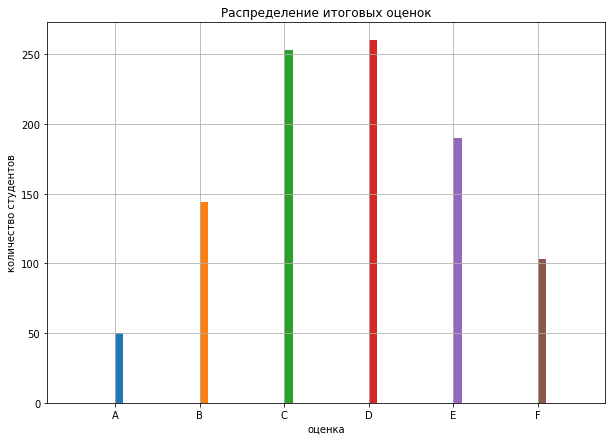

In [71]:
plt.figure(figsize=(10,7))
plt.title('Распределение итоговых оценок')
data_by_grade['Grage'].hist()
plt.xlabel('оценка')
plt.ylabel('количество студентов')
plt.show()

Итак, из гистограммы и полученных значений можно сделать вывод, что распределение оценок похоже на нормальное: чаще всего студенты получают C/D, реже всего - A/F